In [1]:
class Dataset:
    def __init__(self, name, file_types, description):
        self.name = name
        self.file_types = file_types
        self.description = description
        self.files = {}

    def add_file(self, file_type, file_path):
        self.files[file_type] = file_path

    def get_file(self, file_type):
        return self.files.get(file_type, None)

# Create instances of Dataset
datasets = [
    Dataset(name="Bromoform",
            file_types=["cif", "pdb"],
            description="X-ray structure of ELIC in complex with bromoform"),

    Dataset(name="Memantine",
            file_types=["cif", "pdb"],
            description="X-ray structure of ELIC in complex with memantine"),
]

# Add file paths to datasets
datasets[0].add_file("cif", "C:\\Users\\anagh\\OneDrive\\Desktop\\HPSC\\Project 3\\Dataset\\bromoform.cif")
datasets[0].add_file("pdb", "C:\\Users\\anagh\\OneDrive\\Desktop\\HPSC\\Project 3\\Dataset\\bromoform.pdb")

datasets[1].add_file("cif", "C:\\Users\\anagh\\OneDrive\\Desktop\\HPSC\\Project 3\\Dataset\\memantine.cif")
datasets[1].add_file("pdb", "C:\\Users\\anagh\\OneDrive\\Desktop\\HPSC\\Project 3\\Dataset\\memantine.pdb")

# Create instances of Dataset
bromoform_dataset = Dataset(name="Bromoform",
                            file_types=["pdb"],
                            description="X-ray structure of ELIC in complex with bromoform")
bromoform_dataset.add_file("pdb", "C:\\Users\\anagh\\OneDrive\\Desktop\\HPSC\\Project 3\\Dataset\\bromoform.pdb")

memantine_dataset = Dataset(name="Memantine",
                             file_types=["pdb"],
                             description="X-ray structure of ELIC in complex with memantine")
memantine_dataset.add_file("pdb", "C:\\Users\\anagh\\OneDrive\\Desktop\\HPSC\\Project 3\\Dataset\\memantine.pdb")

master_catalog = {
    "Bromoform": bromoform_dataset,
    "Memantine": memantine_dataset,
}

# Create a master catalog
master_catalog = {dataset.name: dataset for dataset in datasets}

for dataset_name, dataset in master_catalog.items():
    print(f"Selected Dataset: {dataset.name}")
    print(f"Description: {dataset.description}")

    # Retrieve and print file paths
    for file_type in dataset.file_types:
        file_path = dataset.get_file(file_type)
        if file_path:
            print(f"{file_type} File: {file_path}")
        else:
            print(f"No file found for type: {file_type}")

    print("-" * 30)

Selected Dataset: Bromoform
Description: X-ray structure of ELIC in complex with bromoform
cif File: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\bromoform.cif
pdb File: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\bromoform.pdb
------------------------------
Selected Dataset: Memantine
Description: X-ray structure of ELIC in complex with memantine
cif File: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\memantine.cif
pdb File: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\memantine.pdb
------------------------------


In [2]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [3]:
from Bio import PDB

def analyze_structure(dataset):
    # Iterate over each dataset in the master catalog
    for dataset_name, dataset_info in dataset.items():
        print(f"Analyzing structure for dataset: {dataset_name}")

        # Iterate over file types in the dataset
        for file_type, file_path in dataset_info.files.items():
            if file_type == "pdb":
                # Create a PDB parser
                parser = PDB.PDBParser(QUIET=True)

                # Load the structure from the PDB file
                structure = parser.get_structure(dataset_name, file_path)

                # Print information about the structure
                print("Structure Details:")
                print(f"Number of models: {len(structure)}")

                for model_id, model in enumerate(structure):
                    print(f"Model {model_id + 1}:")
                    print(f"Number of chains: {len(model)}")

                    # Iterate over chains in the model
                    for chain_id, chain in enumerate(model):
                        print(f"\nChain {chain_id + 1} ({chain.id}):")

                        # Identify ligand-binding sites
                        ligands = []
                        for residue in chain:
                            if PDB.is_aa(residue):
                                #let's consider any amino acid residue as a potential binding site
                                ligands.append(residue.id[1])

                        print(f"Ligand-binding sites: {ligands}")

                        # Identify co-crystallized ligands
                        co_crystallized_ligands = []
                        for hetero in chain.get_list():
                            if PDB.is_aa(hetero):
                                co_crystallized_ligands.append(hetero.id[1])

                        print(f"Co-crystallized ligands: {co_crystallized_ligands}")

if __name__ == "__main__":
    master_catalog = {
        "Bromoform": bromoform_dataset,
        "Memantine": memantine_dataset,
    }

    analyze_structure(master_catalog)

Analyzing structure for dataset: Bromoform
Structure Details:
Number of models: 1
Model 1:
Number of chains: 10

Chain 1 (A):
Ligand-binding sites: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 

In [4]:
from Bio import PDB
import os

def extract_ligands(structure):
    ligands = set()

    for model in structure:
        for chain in model:
            for residue in chain:
                hetfield = residue.id[0]
                if hetfield != " ":
                    ligands.add(residue)

    return ligands

def save_ligand_pdb(ligand, output_path):
    io = PDB.PDBIO()
    io.set_structure(ligand)
    io.save(output_path)

def process_structure_file(file_path, output_dir):
    # Load the structure from the PDB file
    pdb_parser = PDB.PDBParser(QUIET=True)
    structure = pdb_parser.get_structure("ELIC", file_path)

    # Extract ligands
    ligands = extract_ligands(structure)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save each ligand as a separate PDB file
    for idx, ligand in enumerate(ligands):
        ligand_output_path = os.path.join(output_dir, f"ligand_{idx + 1}.pdb")
        save_ligand_pdb(ligand, ligand_output_path)
        print(f"Ligand {idx + 1} saved at: {ligand_output_path}")

    print("Ligand extraction and saving completed.")

if __name__ == "__main__":
    # File paths for both datasets
    bromoform_file_path = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\bromoform.pdb"
    memantine_file_path = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\memantine.pdb"

    # Output directories for both datasets
    bromoform_output_dir = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform"
    memantine_output_dir = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\memantine"

    # Process each structure file
    process_structure_file(bromoform_file_path, bromoform_output_dir)
    process_structure_file(memantine_file_path, memantine_output_dir)

Ligand 1 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_1.pdb
Ligand 2 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_2.pdb
Ligand 3 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_3.pdb
Ligand 4 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_4.pdb
Ligand 5 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_5.pdb
Ligand 6 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_6.pdb
Ligand 7 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_7.pdb
Ligand 8 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_8.pdb
Ligand 9 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_9.pdb
Ligand 10 saved at: C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\ligand_10.pdb
Ligand 11 saved at: C:\Users\anagh\One

In [5]:
from Bio import PDB
import os

def prepare_protein(structure):
    # Create a new Structure object to store the modified protein
    modified_structure = PDB.Structure.Structure(structure.id)

    print("Processing models...")
    # Iterate through models, chains, and residues
    for model in structure:
        print(f"Processing Model {model.id}...")

        # Create a new Model object to store the modified model
        modified_model = PDB.Model.Model(model.id)

        for chain in model:
            print(f"Processing Chain {chain.id}...")

            # Create a new Chain object to store the modified chain
            modified_chain = PDB.Chain.Chain(chain.id)

            for residue in chain:
                try:
                    residue_id = int(residue.id[1])
                    # Skip water molecules and irrelevant heteroatoms
                    if residue.id[0] in [" ", "W"]:
                        modified_chain.add(residue)
                except ValueError:
                    print(f"Skipping residue with non-integer ID: {residue.id}")

            # Add the modified chain to the modified model
            modified_model.add(modified_chain)

        # Add the modified model to the modified structure
        modified_structure.add(modified_model)

    print("Protein preparation completed.")
    return modified_structure

def process_and_save_structure(file_path, output_dir):
    # Load the structure from the PDB file
    pdb_parser = PDB.PDBParser(QUIET=True)
    structure = pdb_parser.get_structure("ELIC", file_path)

    # Prepare the protein structure
    modified_structure = prepare_protein(structure)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save the modified structure as a new PDB file
    output_path = os.path.join(output_dir, "modified_protein.pdb")
    io = PDB.PDBIO()
    io.set_structure(modified_structure)
    io.save(output_path)

    print(f"Modified protein structure saved to {output_path}.")

if __name__ == "__main__":
    # File paths for both datasets
    bromoform_file_path = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\bromoform.pdb"
    memantine_file_path = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\memantine.pdb"

    # Output directories for both datasets
    bromoform_output_dir = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform"
    memantine_output_dir = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\memantine"

    # Process and save structures for both datasets
    process_and_save_structure(bromoform_file_path, bromoform_output_dir)
    process_and_save_structure(memantine_file_path, memantine_output_dir)

Processing models...
Processing Model 0...
Processing Chain A...
Processing Chain B...
Processing Chain C...
Processing Chain D...
Processing Chain E...
Processing Chain F...
Processing Chain G...
Processing Chain H...
Processing Chain I...
Processing Chain J...
Protein preparation completed.
Modified protein structure saved to C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\bromoform\modified_protein.pdb.
Processing models...
Processing Model 0...
Processing Chain A...
Processing Chain B...
Processing Chain C...
Processing Chain D...
Processing Chain E...
Processing Chain F...
Processing Chain G...
Processing Chain H...
Processing Chain I...
Processing Chain J...
Protein preparation completed.
Modified protein structure saved to C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\memantine\modified_protein.pdb.


In [6]:
from Bio.PDB import is_aa

def analyze_binding_sites(structure):
    binding_sites = []

    for model in structure:
        for chain in model:
            for residue in chain:
                if is_aa(residue):
                    # let's consider amino acid residues as potential binding sites
                    if is_potential_binding_site(residue):
                        binding_sites.append({
                            'chain_id': chain.id,
                            'residue_id': residue.id[1],
                            'residue_name': residue.resname,
                            'coordinates': residue.get_unpacked_list(),
                        })

    return binding_sites

def is_potential_binding_site(residue):
    binding_residues = {'ARG', 'LYS'}
    return residue.resname in binding_residues

# Load the structure from the PDB file
pdb_parser = PDB.PDBParser(QUIET=True)
structure = pdb_parser.get_structure("ELIC", r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Dataset\bromoform.pdb")

# Analyze binding sites
binding_sites = analyze_binding_sites(structure)

# Print the identified binding sites
print("Identified Binding Sites:")
for site in binding_sites:
    print(f"Chain: {site['chain_id']}, Residue ID: {site['residue_id']}, Residue Name: {site['residue_name']}, Coordinates: {site['coordinates']}")

Identified Binding Sites:
Chain: A, Residue ID: 22, Residue Name: LYS, Coordinates: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom CE>, <Atom NZ>]
Chain: A, Residue ID: 34, Residue Name: LYS, Coordinates: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom CE>, <Atom NZ>]
Chain: A, Residue ID: 46, Residue Name: LYS, Coordinates: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom CE>, <Atom NZ>]
Chain: A, Residue ID: 48, Residue Name: ARG, Coordinates: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom NE>, <Atom CZ>, <Atom NH1>, <Atom NH2>]
Chain: A, Residue ID: 49, Residue Name: LYS, Coordinates: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom CE>, <Atom NZ>]
Chain: A, Residue ID: 54, Residue Name: LYS, Coordinates: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom CE>, <Atom NZ>]
Chain: A, Residue ID

In [7]:
import concurrent.futures
import time

def process_and_save_structure(file_path, output_dir):
    # Load the structure from the PDB file
    pdb_parser = PDB.PDBParser(QUIET=True)
    structure = pdb_parser.get_structure("ELIC", file_path)

    # Analyze binding sites
    analyze_binding_sites(structure)

    # Prepare the protein structure
    modified_structure = prepare_protein(structure)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save the modified structure as a new PDB file
    output_path = os.path.join(output_dir, "modified_protein.pdb")
    io = PDB.PDBIO()
    io.set_structure(modified_structure)
    io.save(output_path)

    print(f"Modified protein structure saved to {output_path}.")

def process_dataset_sequential(dataset, output_dir):
    for file_type, file_path in dataset.files.items():
        # Process and save structure for each file in the dataset sequentially
        try:
            process_and_save_structure(file_path, output_dir)
        except ValueError as e:
            print(f"Error processing {file_path}: {e}")

def process_dataset_parallel(dataset, output_dir):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for file_type, file_path in dataset.files.items():
            # Submit tasks for each file in the dataset
            futures.append(executor.submit(process_and_save_structure, file_path, output_dir))
        # Wait for all tasks to complete
        concurrent.futures.wait(futures)

if __name__ == "__main__":
    # Output directories for sequential and parallel processing
    sequential_output_dir = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\sequential"
    parallel_output_dir = r"C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\parallel"

    # Sequential execution
    start_time = time.time()
    for dataset_name, dataset in master_catalog.items():
        print(f"Processing dataset sequentially: {dataset_name}")
        process_dataset_sequential(dataset, sequential_output_dir)
    sequential_execution_time = time.time() - start_time
    print(f"Sequential Execution Time: {sequential_execution_time:.4f} seconds")

    # Parallel execution
    start_time = time.time()
    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = []
        for dataset_name, dataset in master_catalog.items():
            print(f"Processing dataset parallely: {dataset_name}")
            # Submit tasks for each dataset in parallel
            futures.append(executor.submit(process_dataset_parallel, dataset, parallel_output_dir))

        # Wait for all tasks to complete
        concurrent.futures.wait(futures)
    parallel_execution_time = time.time() - start_time
    print(f"Parallel Execution Time: {parallel_execution_time:.4f} seconds")

    # Calculate speedup and efficiency
    speedup = sequential_execution_time / parallel_execution_time
    efficiency = speedup / len(master_catalog)
    
    print(f"Speedup: {speedup:.4f}")
    print(f"Efficiency: {efficiency:.4f}")

Processing dataset sequentially: Bromoform
Processing models...
Processing Model 0...
Processing Chain A...
Processing Chain B...
Processing Chain C...
Processing Chain D...
Processing Chain E...
Processing Chain F...
Processing Chain G...
Processing Chain H...
Processing Chain I...
Processing Chain J...
Protein preparation completed.
Modified protein structure saved to C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\sequential\modified_protein.pdb.
Processing dataset sequentially: Memantine
Processing models...
Processing Model 0...
Processing Chain A...
Processing Chain B...
Processing Chain C...
Processing Chain D...
Processing Chain E...
Processing Chain F...
Processing Chain G...
Processing Chain H...
Processing Chain I...
Processing Chain J...
Protein preparation completed.
Modified protein structure saved to C:\Users\anagh\OneDrive\Desktop\HPSC\Project 3\Output\sequential\modified_protein.pdb.
Sequential Execution Time: 1.5317 seconds
Processing dataset parallely: Bromofor

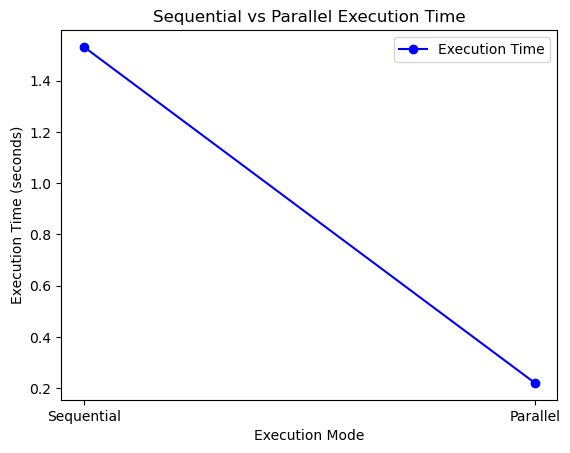

In [9]:
import matplotlib.pyplot as plt

# Data
execution_modes = ['Sequential', 'Parallel']
execution_times = [sequential_execution_time, parallel_execution_time]

# Create a line graph
plt.plot(execution_modes, execution_times, marker='o', linestyle='-', color='b', label='Execution Time')

# Add labels and title
plt.xlabel('Execution Mode')
plt.ylabel('Execution Time (seconds)')
plt.title('Sequential vs Parallel Execution Time')

# Display the graph
plt.legend()
plt.show()